In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
%matplotlib inline

sns.set_theme(style="whitegrid")

In [2]:
cf.go_offline()

In [3]:
df = pd.read_csv("Austin Dog Shelter/Austin_Animal_Center_Intakes.csv")

Chose from __Kaggle.com__ some Datasets for some __Exploratory Data Analysis(EDA)__ practice.

__DATASET DETAILS__
***
Austin Texas - Animal Center Intakes from Oct, 1st 2013 to present [date of data publish]. __Intakes__ represent the status of animals as they arrive at the Animal Center. All animals receive a __unique Animal ID__ during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners.

Data can be found here https://data.austintexas.gov/
***
Let's start by having a quick look at the head of the dataframe.

In [4]:
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


***
We can see the format of the columns and below what type of object each column is. 
We have a Total Number of __124120 unique entries__ as per the Unique Animal ID's.    
__DateTime__ it's in a string form so we will have to transform it in a Datetime format so that we can make use of it easier for some analysis.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


***
Let's have a look at some individual numbers for each __Animal Type__ with value_counts() method.   
We can see that on top are Dogs, followed by Cats, and we have 3 more categories with fewer entries.

In [6]:
df['Animal Type'].value_counts()

Dog          70447
Cat          46455
Other         6610
Bird           586
Livestock       22
Name: Animal Type, dtype: int64

In [7]:
df['Animal Type'].iplot(kind='histogram', colors=['red'], theme='white', title='Animal by Type')

***
Let's see now the __Intake Types__ number and how they look on a countplot.   
We can clearly see that the __majority of intake types__ are coming as "Stray", followed by animals that are surrendered by their owners. On the right side we see the lower numbers coming from abandoded and euthanasia requests.

In [8]:
df['Intake Type'].value_counts()

Stray                 86455
Owner Surrender       24606
Public Assist          7621
Wildlife               4898
Abandoned               283
Euthanasia Request      257
Name: Intake Type, dtype: int64

Text(0.5, 1.0, 'Distribution of Intake Types')

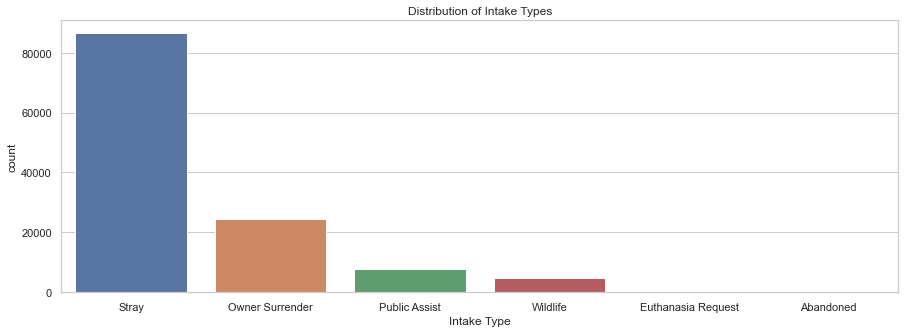

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x='Intake Type', data=df)
plt.title('Distribution of Intake Types')

***
Staying on the same subject, I wanted to see the breakdown for __Animal Types__ based on __Intake Type__.   
For Dogs and Cats we can see that the majority come as "Stray", while for the __Other__ category we see that it is mostly "Wildlife".   
As we do not have more details on this "Other" category we can assume that are animals rescued from the wild based on the graph. 

Text(0.5, 1.0, 'Distribution of Animal Types based on "Intake Type" category')

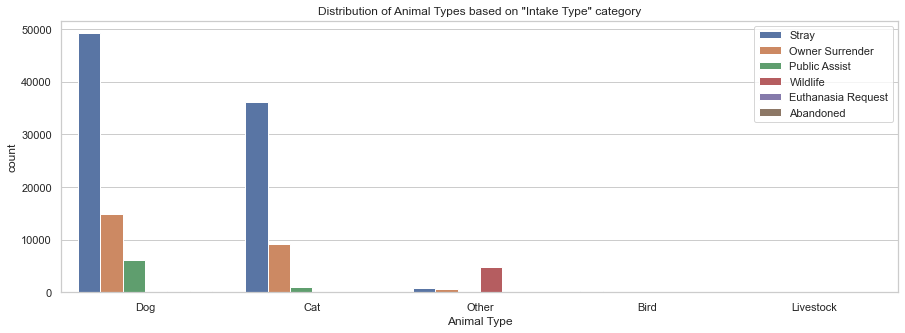

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Animal Type', hue='Intake Type')
plt.legend(loc='upper right')
plt.title('Distribution of Animal Types based on "Intake Type" category')

***
I was curious to analyse more on the __Euthanasia Request__ to see the breakdown per __Animal Type__. We can see that the majority is represented by dogs, followed by Cats and the other 2 categories with lower entries.   

Text(0.5, 1.0, 'Distribution of Euthanasia Requests Intake Type based on Animal Type')

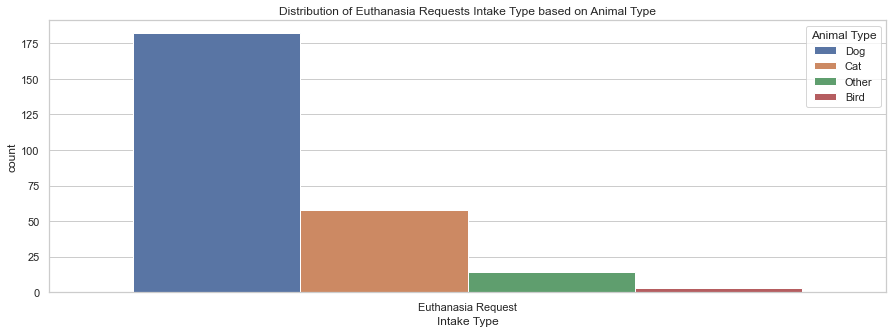

In [11]:
by_euth = df[df['Intake Type']=='Euthanasia Request']
plt.figure(figsize=(15,5))
sns.countplot(x='Intake Type', hue='Animal Type', data=by_euth, hue_order=by_euth['Animal Type'].value_counts().index)
plt.title('Distribution of Euthanasia Requests Intake Type based on Animal Type')

***
Wanted to see a distribution for each type of animal, based on the __Intake Condition__. We can see that the majority come in __Normal__ condition, followed by 3 categories that are quite similar. The rest of intake conditions numbers are very small and not even show on the plot with this specific plot sizes.

Text(0.5, 1.0, 'Distribution of Intake Conditions based on Animal Types')

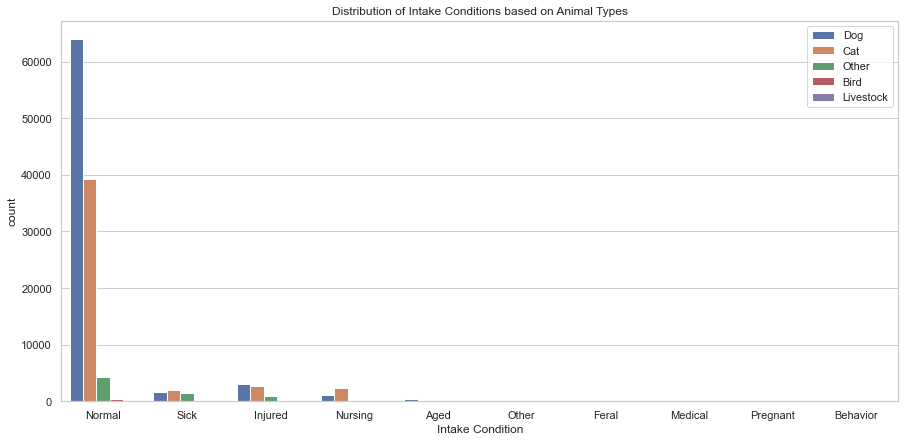

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(x='Intake Condition', hue="Animal Type", data=df)
plt.legend(loc='upper right')
plt.title('Distribution of Intake Conditions based on Animal Types')

***
We can see below the counts for different categories of __Animal's Sex upon Intake__ for all types of animals. We see __close values__ between __Intact Male & Female__ and same for __Neutered Male & Spayed Female__. 

We have also quite a few values where sex is defined as __Unknown__. I was not able to find details on this so we can assume based on the plot below and the previous assumptions where in the Other cateogory we saw a lot of "Wildlife" type of intakes, that might have been difficult to define the sex of some of this animals. 

In [13]:
df['Sex upon Intake'].value_counts()

Intact Male      40316
Intact Female    38118
Neutered Male    19142
Spayed Female    16310
Unknown          10233
Name: Sex upon Intake, dtype: int64

***
Judging by the plot below, for __Dogs__ we see that __most__ of the intakes were __Intact Males & Females__, with a bit less entries for __Neutered Males & Spayed Females__.    

For __Cats__ we see similar numbers for  __Intact Males & Females__ but a significant difference for __Neutered Males & Spayed Females__, as entries are a bit less than half. 

Text(0.5, 1.0, 'Distribution of Animal Types based on "Sex Upon Intake" category')

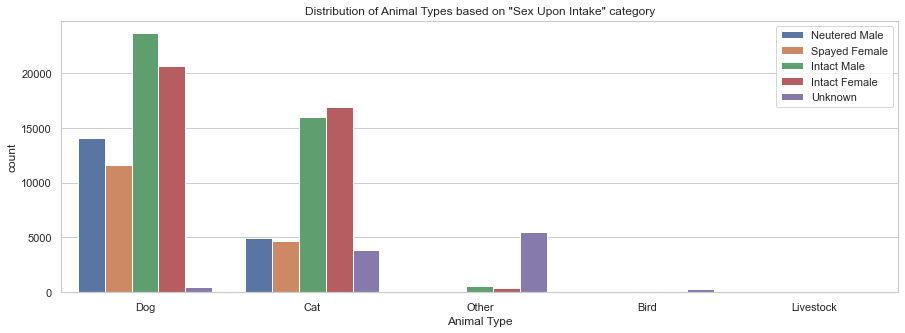

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Animal Type', hue='Sex upon Intake')
plt.legend(loc='upper right')
plt.title('Distribution of Animal Types based on "Sex Upon Intake" category')

***
Let us see now the locations where this animals come from. As we can see below, the column for the location has a full address. As we see that for each entry the __state reference__ is at the end, we can apply a formula using a lambda to just pick up the states, and creating a new column for it.   

In [15]:
df['Found Location'].head()

0    2501 Magin Meadow Dr in Austin (TX)
1       9409 Bluegrass Dr in Austin (TX)
2     2818 Palomino Trail in Austin (TX)
3                            Austin (TX)
4          800 Grove Blvd in Austin (TX)
Name: Found Location, dtype: object

In [16]:
df['State where Found'] = df['Found Location'].apply(lambda x : x[-3:-1])

In [17]:
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,State where Found
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,TX
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,TX
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,TX
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,TX
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,TX


***
Once we have the new column, we can see the __distribution by state__ in the plot below. Texas has the most entries as expected, followed by (io) which I do not think it's a state abbreviation, as we can see below that the breakdown for that says "Outside Jurisdiction" 

In [18]:
df[df['State where Found']=='io']['Found Location'].value_counts()

Outside Jurisdiction    1529
Name: Found Location, dtype: int64

<AxesSubplot:xlabel='State where Found', ylabel='count'>

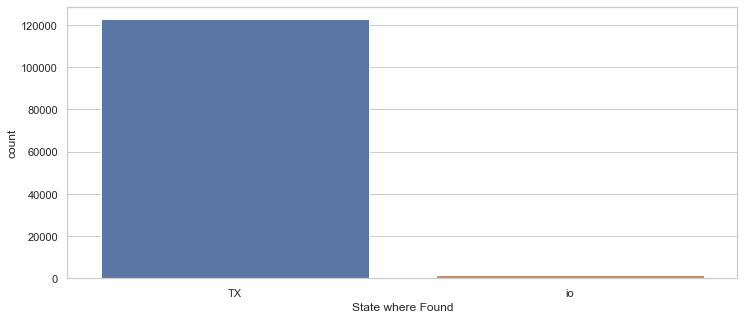

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x='State where Found', data=df)

For Texas State we can see that most of the unique location intakes are from __Austin__ with over 20k, followed by Travis, and 3 more with lower numbers.

<AxesSubplot:>

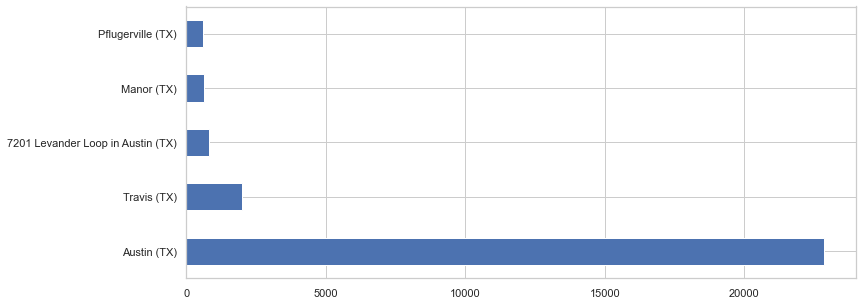

In [20]:
plt.figure(figsize=(12,5))
df[df['State where Found']=='TX']['Found Location'].value_counts().head(5).plot(kind='barh')

***
As I mentioned initially, the "DateTime" column was a string type, so we will need to change it to a datetime format using an existing Pandas method. We will keep the same column.

In [21]:
df['MonthYear'] = pd.to_datetime(df['MonthYear'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Animal ID          124120 non-null  object        
 1   Name               85069 non-null   object        
 2   DateTime           124120 non-null  object        
 3   MonthYear          124120 non-null  datetime64[ns]
 4   Found Location     124120 non-null  object        
 5   Intake Type        124120 non-null  object        
 6   Intake Condition   124120 non-null  object        
 7   Animal Type        124120 non-null  object        
 8   Sex upon Intake    124119 non-null  object        
 9   Age upon Intake    124120 non-null  object        
 10  Breed              124120 non-null  object        
 11  Color              124120 non-null  object        
 12  State where Found  124120 non-null  object        
dtypes: datetime64[ns](1), object(12)
memory usag

***
As we have the nicely formatted column, let's do some investigation based on this.

Having a look at the distribution per year, we can see 2013 & 2021 with lower entries, and we can see in the cell below that in 2013 only last 3 months of the year were present in the dataset, and in 2021 only first 3.

For the remaining months, we see a stable number of intakes.

Text(0.5, 1.0, 'Distribution of Intakes per Year')

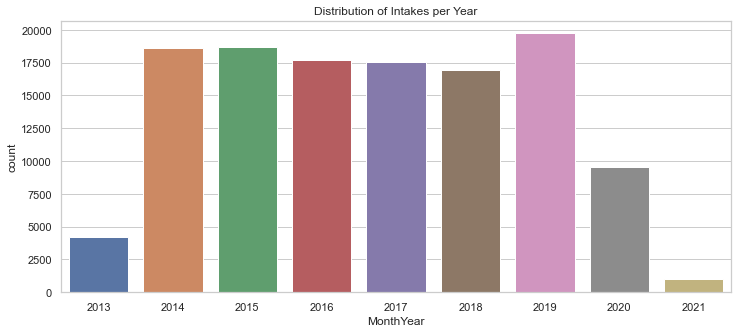

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['MonthYear'].dt.year, data=df)
plt.title("Distribution of Intakes per Year")

In [34]:
df[df['MonthYear'].dt.year == 2013]['MonthYear'].dt.month.value_counts()

10    1589
11    1323
12    1270
Name: MonthYear, dtype: int64

In [35]:
df[df['MonthYear'].dt.year == 2021]['MonthYear'].dt.month.value_counts()

1    568
2    387
3     84
Name: MonthYear, dtype: int64

***
We saw the distribution per year, let's see now the distribution per months for 2013-2021 period.

Plot below shows that between the 5th Month (May) and 10th (October), the number of intakes is a bit higher than the rest.

Text(0.5, 1.0, 'Distribution of Intakes per Months (2013-2021)')

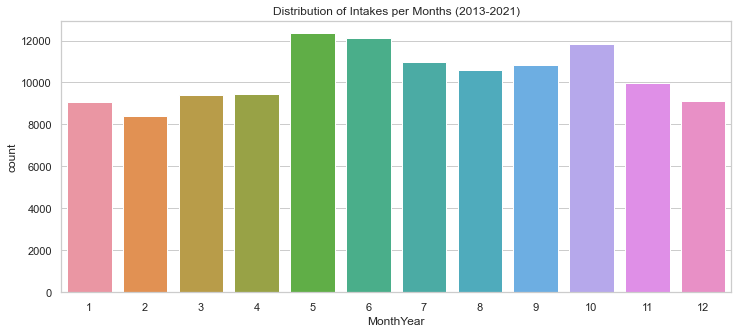

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['MonthYear'].dt.month, data=df)
plt.title('Distribution of Intakes per Months (2013-2021)')

***
I was curious about the age of the animals on intake. Went ahead and checked the top 10 by the number of entries. We can see below that __most__ of the animals were __around 1 year old__, aproximately 21k, followed by the ones who were 2 years of age around 19k. We see also around 12k animals that were brought very young at 1 month old.

We can see a patern where animals of younger age are brought in, probably because their owners are not able to handle them.

Text(0.5, 1.0, 'Top 10 Animal Intage age')

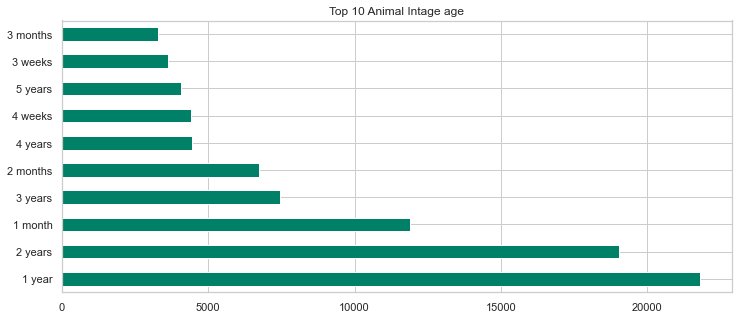

In [110]:
plt.figure(figsize=(12,5))
df['Age upon Intake'].value_counts().head(10).plot(kind='barh', colormap='summer')
plt.title('Top 10 Animal Intage age')

This concludes my short EDA on this dataset. Actually, this is my first ever EDA after I finished a course in Data Science. Still a lot to learn but Rome was not built in a day, so with time comes improvement. Thank you if you reached until here.